In [ ]:
!pip install matplotlib deap

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
num_locations = 10 # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]# Generate random (x, y) coordinates for each location
depot = (50, 50)# Define the central depot location as a fixed point
num_vehicles = 3# Define how many vehicles are available to visit the locations


In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))   # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)# Define individual structure. Individuals are lists with a fitness attribute.
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations) # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices) # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)# Function to create a population of individuals



/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
def evalVRP(individual):
    total_distance = 0
    distances = [] # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot

    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k + 1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route) - 1))
        # Calculate total distance traveled by this vehicle
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)# Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty


In [ ]:
toolbox.register("evaluate", evalVRP)

In [ ]:
toolbox.register("mate", tools.cxPartialyMatched)# Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)# Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3) # Register the selection function using tournament selection


In [ ]:
def plot_routes(individual, title="Routes"):
    plt.figure() # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')
     # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


In [ ]:
def main():
    random.seed(42)# Seed for reproducibility
    pop = toolbox.population(n=300)# Generate initial population
    hof = tools.HallOfFame(1)# Hall of Fame to store the best individual

        # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
     # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)
    return pop, stats, hof

if __name__ == "__main__":
    pop, stats, hof = main()
    print(f"Best individual is {hof[0]}")
    print(f"Best fitness is {hof[0].fitness}")

gen	nevals	avg    	min    
0  	300   	310.708	2.32796
1  	220   	294.605	2.02384
2  	240   	286.4  	2.02995
3  	229   	284.572	1.33069
4  	228   	285.289	2.87314
5  	218   	276.204	3.9518 
6  	220   	271.731	2.45992
7  	232   	271.83 	4.25977
8  	223   	267.608	2.02569
9  	219   	256.674	2.72278
10 	251   	250.713	7.01534
11 	221   	240.182	0.826264
12 	221   	231.744	2.72278 
13 	212   	227.871	0.826264
14 	216   	225.656	3.22016 
15 	222   	223.709	8.7409  
16 	229   	220.153	11.5058 
17 	230   	220.57 	7.01784 
18 	228   	215.89 	9.15567 
19 	244   	209.931	9.15624 
20 	223   	207.243	12.0304 
21 	222   	209.214	12.0304 
22 	223   	206.397	15.2597 
23 	218   	206.666	11.5058 
24 	240   	207.758	16.6644 
25 	227   	207.896	16.4964 
26 	235   	206.655	12.0304 
27 	235   	208.505	12.3118 
28 	235   	206.909	13.3619 
29 	240   	208.154	12.3118 
30 	235   	205.721	12.0304 
Best individual is [9, 0, 5, 3, 8, 7, 4, 6, 1, 2]
Best fitness is (385.50526052239996, 16.716938709281152)


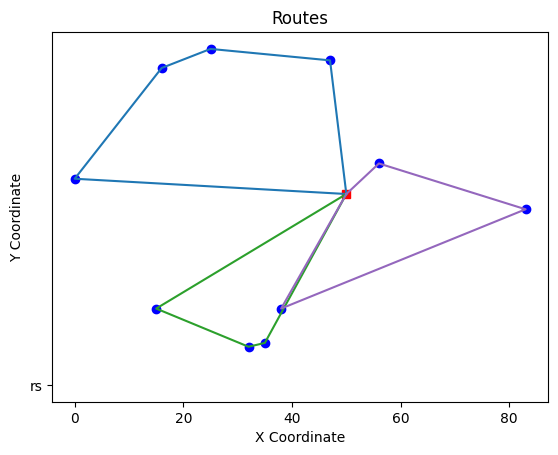

In [ ]:
plot_routes(hof[0])